In [38]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [39]:
load_dotenv()

True

In [40]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [41]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [42]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [58]:
start = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-01-22", tz="America/New_York").isoformat()

tickers = ["AMZN", "AAPL", "NFLX"]
timeframe = "1D"

In [59]:
year_results = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df


year_results.head(10)

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2020-01-02 00:00:00-05:00  296.24  300.6000  295.190  300.58  30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.500  297.38  31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.750  299.78  27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.480  298.27  23877417   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.156  303.15  29547763   
2020-01-09 00:00:00-05:00  307.25  310.4300  306.200  309.71  39240341   
2020-01-10 00:00:00-05:00  310.60  312.6700  308.250  310.37  32981826   
2020-01-13 00:00:00-05:00  311.66  317.0700  311.150  316.97  28105058   
2020-01-14 00:00:00-05:00  316.70  317.5700  312.170  312.69  37279469   
2020-01-15 00:00:00-05:00  311.85  315.5000  309.550  311.50  28107488   

                              AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2020-01-02 00:00:00-05:00  1874.79  1898.0000  1864.1500  1897.71  3583611   
2020-01-03 00:00:00-05:00  1864.50  1886.1965  1864.5000  1874.93  3293469   
2020-01-06 00:00:00-05:00  1860.00  1903.6900  1860.0000  1903.33  3598872   
2020-01-07 00:00:00-05:00  1904.50  1913.8900  1892.0433  1906.86  3569706   
2020-01-08 00:00:00-05:00  1898.68  1910.9999  1886.4448  1892.09  3100021   
2020-01-09 00:00:00-05:00  1909.89  1917.8200  1895.8038  1901.00  2913887   
2020-01-10 00:00:00-05:00  1905.37  1906.9400  1880.0000  1882.98  2652859   
2020-01-13 00:00:00-05:00  1891.31  1898.0000  1880.8000  1891.41  2515868   
2020-01-14 00:00:00-05:00  1885.96  1887.1100  1858.5500  1869.20  3123178   
2020-01-15 00:00:00-05:00  1872.13  1878.8600  1855.0900  1862.01  2658380   

                             NFLX                                         
                             open      high       low     close   volume  
time                                                                      
2020-01-02 00:00:00-05:00  326.32  329.9800  324.7800  329.8200  3966616  
2020-01-03 00:00:00-05:00  326.78  329.8599  325.5300  325.9000  3453110  
2020-01-06 00:00:00-05:00  323.12  336.3600  321.2000  335.8300  5216762  
2020-01-07 00:00:00-05:00  336.47  336.7000  330.3000  330.7750  4064861  
2020-01-08 00:00:00-05:00  331.49  342.7000  331.0500  339.1400  6591467  
2020-01-09 00:00:00-05:00  342.00  343.4196  334.6101  335.6448  4213754  
2020-01-10 00:00:00-05:00  337.13  338.5000  327.2700  329.0900  4279731  
2020-01-13 00:00:00-05:00  331.80  340.8500  331.5100  338.9400  5485620  
2020-01-14 00:00:00-05:00  344.30  345.3800  335.5200  338.7300  6678976  
2020-01-15 00:00:00-05:00  338.68  343.1700  336.6000  339.1900  4134366

In [60]:
close_df = pd.DataFrame()
close_df["AAPL"] = year_results["AAPL"]["close"]
close_df["AMZN"] = year_results["AMZN"]["close"]
close_df["NFLX"] = year_results["NFLX"]["close"]
close_df.index = close_df.index.date
close_df.head(10)

,AAPL,AMZN,NFLX
2020-01-02,300.58,1897.71,329.8200
2020-01-03,297.38,1874.93,325.9000
2020-01-06,299.78,1903.33,335.8300
2020-01-07,298.27,1906.86,330.7750
2020-01-08,303.15,1892.09,339.1400
2020-01-09,309.71,1901.00,335.6448
2020-01-10,310.37,1882.98,329.0900
2020-01-13,316.97,1891.41,338.9400
2020-01-14,312.69,1869.20,338.7300
2020-01-15,311.50,1862.01,339.1900


<AxesSubplot:title={'center':'Daily Returns of AMZN and AAPL and NFLX'}>

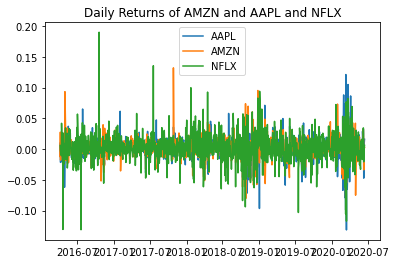

In [68]:
df_daily_returns.plot(title="Daily Returns of AMZN and AAPL and NFLX")

In [69]:
Sharpe_Ratio = close_df['AAPL'].mean() / close_df['AAPL'].std()
Sharpe_Ratio

39.6170856174708

In [70]:
Sharpe_Ratio = close_df['AMZN'].mean() / close_df['AMZN'].std()
Sharpe_Ratio

130.47095687810207

In [71]:
Sharpe_Ratio = close_df['NFLX'].mean() / close_df['NFLX'].std()
Sharpe_Ratio

64.117171868146

In [72]:
close_df.pct_change()

,AAPL,AMZN,NFLX
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.010646,-0.012004,-0.011885
2020-01-06,0.008070,0.015147,0.030469
2020-01-07,-0.005037,0.001855,-0.015052
2020-01-08,0.016361,-0.007746,0.025289
2020-01-09,0.021639,0.004709,-0.010306
2020-01-10,0.002131,-0.009479,-0.019529
2020-01-13,0.021265,0.004477,0.029931
2020-01-14,-0.013503,-0.011743,-0.000620
2020-01-15,-0.003806,-0.003847,0.001358


<AxesSubplot:>

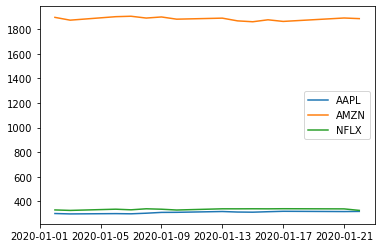

In [73]:
close_df.plot()

In [74]:
start = pd.Timestamp("2016-04-02", tz="America/New_York").isoformat()
end = pd.Timestamp("2016-06-15", tz="America/New_York").isoformat()

year_results = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df


year_results.head(10)

AAPL                                       \
                             open    high      low     close    volume   
time                                                                     
2016-04-04 00:00:00-04:00  110.42  112.19  110.270  111.1299  31875602   
2016-04-05 00:00:00-04:00  109.65  110.73  109.420  109.8030  22556763   
2016-04-06 00:00:00-04:00  110.23  110.98  109.200  110.9510  22315281   
2016-04-07 00:00:00-04:00  109.95  110.42  108.121  108.5400  25673179   
2016-04-08 00:00:00-04:00  108.91  109.77  108.170  108.6600  19868446   
2016-04-11 00:00:00-04:00  108.97  110.61  108.830  109.0300  23700140   
2016-04-12 00:00:00-04:00  109.37  110.50  108.660  110.4400  23749272   
2016-04-13 00:00:00-04:00  110.80  112.34  110.800  112.0400  28494232   
2016-04-14 00:00:00-04:00  111.62  112.39  111.330  112.1000  21602652   
2016-04-15 00:00:00-04:00  112.02  112.30  109.730  109.8140  38138643   

                             AMZN                                     NFLX  \
                             open    high     low   close   volume    open   
time                                                                         
2016-04-04 00:00:00-04:00  599.44  599.50  590.55  593.19  1824141  105.90   
2016-04-05 00:00:00-04:00  590.77  593.47  585.25  586.14  1564851  103.48   
2016-04-06 00:00:00-04:00  587.52  602.39  587.50  602.29  2113587  105.30   
2016-04-07 00:00:00-04:00  598.76  599.60  589.08  591.43  2273053  104.31   
2016-04-08 00:00:00-04:00  594.32  597.86  589.00  594.60  1942667  105.13   
2016-04-11 00:00:00-04:00  596.14  604.00  594.91  595.92  1898909  104.04   
2016-04-12 00:00:00-04:00  598.40  604.06  592.31  603.40  1867680  103.15   
2016-04-13 00:00:00-04:00  607.68  616.81  605.29  615.20  3013506  108.00   
2016-04-14 00:00:00-04:00  615.07  624.38  615.07  620.75  2240922  110.01   
2016-04-15 00:00:00-04:00  621.87  626.77  618.11  625.98  2037747  110.63   

                                                                  
                              high       low     close    volume  
time                                                              
2016-04-04 00:00:00-04:00  105.920  103.2000  104.3500   9915861  
2016-04-05 00:00:00-04:00  105.750  103.2500  104.9500   8902466  
2016-04-06 00:00:00-04:00  106.440  104.2500  104.8301   8741779  
2016-04-07 00:00:00-04:00  106.435  103.6000  104.4500   9694448  
2016-04-08 00:00:00-04:00  105.326  102.8200  103.8100   7144864  
2016-04-11 00:00:00-04:00  104.980  102.6200  102.6800   6600036  
2016-04-12 00:00:00-04:00  107.220  102.2100  106.9800  11269974  
2016-04-13 00:00:00-04:00  111.280  107.8800  109.6500  15107447  
2016-04-14 00:00:00-04:00  111.640  109.1500  110.4300   8575034  
2016-04-15 00:00:00-04:00  111.850  109.7803  111.5100  10660151

In [75]:
close_df = pd.DataFrame()
close_df["AAPL"] = year_results["AAPL"]["close"]
close_df["AMZN"] = year_results["AMZN"]["close"]
close_df["NFLX"] = year_results["NFLX"]["close"]
close_df.index = close_df.index.date
close_df.head(10)

,AAPL,AMZN,NFLX
2016-04-04,111.1299,593.19,104.3500
2016-04-05,109.8030,586.14,104.9500
2016-04-06,110.9510,602.29,104.8301
2016-04-07,108.5400,591.43,104.4500
2016-04-08,108.6600,594.60,103.8100
2016-04-11,109.0300,595.92,102.6800
2016-04-12,110.4400,603.40,106.9800
2016-04-13,112.0400,615.20,109.6500
2016-04-14,112.1000,620.75,110.4300
2016-04-15,109.8140,625.98,111.5100


In [76]:
Sharpe_Ratio = close_df['AAPL'].mean() / close_df['AAPL'].std()
Sharpe_Ratio

15.402314685240526

In [77]:
Sharpe_Ratio = close_df['AMZN'].mean() / close_df['AMZN'].std()
Sharpe_Ratio

13.786280165344062

In [78]:
Sharpe_Ratio = close_df['NFLX'].mean() / close_df['NFLX'].std()
Sharpe_Ratio

14.759106738580737